In [1]:
import sys
import pickle
import copy
import json
import csv
import ast
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
with open('SpatialVoc2k/french_2_3.json') as f:
    data = json.load(f)
f.close()

In [3]:
len(data)

1554

In [4]:
img_name = list(data.keys())[0]
object_number = 'object_'+str(0)
name_number = 'name_' + str(0)
vars()[name_number] = data.get(img_name).get('objects').get(object_number).get('name')

In [5]:
subject = data.get(img_name).get('relations')[1].get('object_0')
trajectory = data.get(img_name).get('relations')[1].get('object_1')
print(subject,trajectory)

la_personne le_train


In [3]:
all_labels = []
Solo = False
for x in range(len(data)):
    img_name = list(data.keys())[x]
    width = data.get(img_name).get('width')
    height = data.get(img_name).get('height')
    
    for i in range(len(data.get(img_name).get('objects'))):
        object_number = 'object_'+str(i)
        test = data.get(img_name).get('objects').get(object_number)
        name = data.get(img_name).get('objects').get(object_number).get('name')
        x = data.get(img_name).get('objects').get(object_number).get('xmin')
        y = data.get(img_name).get('objects').get(object_number).get('ymin')
        w = data.get(img_name).get('objects').get(object_number).get('xmax') - x 
        h = data.get(img_name).get('objects').get(object_number).get('ymax') - y 
        vars()[name] = [x,y,w,h]
        #print(name)

    for i in range(len(data.get(img_name).get('relations'))):
        subject = data.get(img_name).get('relations')[i].get('object_0')
        objective = data.get(img_name).get('relations')[i].get('object_1')
        labels = data.get(img_name).get('relations')[i].get('all')
        for j in range(len(labels)):                            
            if labels[j] == 'au_dessous_de' or labels[j] == 'a_cote' or labels[j] == 'en_travers_de' or labels[j] == 'pres' :
                Solo = True
            else:
                all_labels.append(labels[j])
        
        if Solo == False:
            #if objective[len(objective)-1:].isdigit() == True:
            #    objective = objective[:-2]
            #if subject[len(subject)-1:].isdigit() == True:
            #    subject = subject[:-2]
                
            with open("SpatialVoc2k/SpatialVoc2k_Edited.csv","a",newline="") as f1: 
                cw = csv.writer(f1)
                cw.writerow([labels]+[width,height]+[vars()[subject]]+[vars()[objective]]+[subject]+[objective])
            f1.close()
        else:
            Solo = False

In [4]:
spatials = Counter(all_labels)
print(spatials)

Counter({'pres_de': 2856, 'a_cote_de': 1773, 'devant': 1372, 'derriere': 1326, 'au_niveau_de': 1155, 'contre': 730, 'sous': 533, 'loin_de': 476, 'sur': 447, 'en_face_de': 333, 'au_dessus_de': 148, 'le_long_de': 85, 'dans': 74, "a_l'exterieur_de": 51, 'par_dela': 47, 'autour_de': 42, 'aucun': 28})


In [9]:
if objective[len(objective)-1:].isdigit() == True:
    objective = objective[:-2]

print(objective)

la_plante


In [5]:
with open("SpatialVoc2k/SpatialVoc2k_Edited.csv", 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)
f.close()

In [6]:
spatial = []
single = 0
multi = 0
multi_spatial = []
for i in range(len(your_list)):
    x = ast.literal_eval(your_list[i][0])
    x = [n.strip() for n in x]
    if len(x) > 1 :
        multi_spatial.append(x)
        multi += 1
    for j in range(len(x)):
        single += 1 
        spatial.append(x[j])
    

In [7]:
spatials = Counter(spatial)
print(spatials)

Counter({'pres_de': 2854, 'a_cote_de': 1771, 'devant': 1372, 'derriere': 1325, 'au_niveau_de': 1152, 'contre': 730, 'sous': 533, 'loin_de': 476, 'sur': 447, 'en_face_de': 333, 'au_dessus_de': 148, 'le_long_de': 85, 'dans': 74, "a_l'exterieur_de": 51, 'par_dela': 47, 'autour_de': 42, 'aucun': 28})


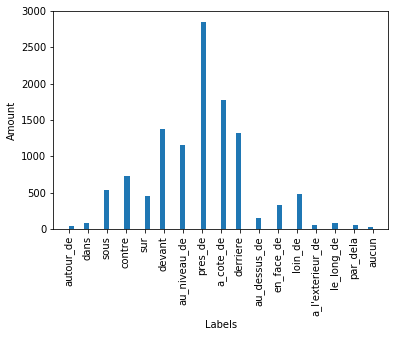

In [8]:
plt.hist(spatial,bins = 60)
plt.xlabel('Labels')
plt.xticks(rotation=90)
plt.ylabel('Amount');
plt.savefig('Statistics/AllLabelsSpatialVoc2k.png')

In [88]:
Multi_Counter = Counter(str(e) for e in multi_spatial)
print(Multi_Counter)

Counter({"['a_cote_de', 'au_niveau_de', 'pres_de']": 638, "['derriere', 'pres_de']": 366, "['devant', 'pres_de']": 338, "['sur', 'contre']": 188, "['a_cote_de', 'pres_de']": 185, "['sous', 'contre']": 132, "['devant', 'loin_de']": 129, "['derriere', 'loin_de']": 104, "['a_cote_de', 'devant', 'pres_de']": 96, "['a_cote_de', 'derriere', 'pres_de']": 86, "['derriere', 'a_cote_de', 'pres_de']": 78, "['devant', 'a_cote_de', 'pres_de']": 71, "['en_face_de', 'pres_de']": 61, "['loin_de', 'devant']": 57, "['pres_de', 'devant']": 55, "['loin_de', 'derriere']": 55, "['contre', 'a_cote_de', 'au_niveau_de']": 55, "['pres_de', 'au_niveau_de']": 48, "['a_cote_de', 'au_niveau_de']": 44, "['au_niveau_de', 'pres_de']": 42, "['pres_de', 'derriere']": 39, "['a_cote_de', 'au_niveau_de', 'contre']": 39, "['pres_de', 'a_cote_de']": 38, "['derriere', 'contre']": 37, "['au_dessus_de', 'pres_de']": 35, "['en_face_de', 'devant', 'pres_de']": 33, "['devant', 'contre']": 29, "['sous', 'pres_de']": 25, "['pres_de'

In [9]:
def stratified_sampling(your_list):
    print(len(your_list))
    #Store the counters of the labels
    train_labels = []
    test_labels =[]
    valid_labels = []
    #Store information of image
    train_info = []
    test_info = []
    valid_info = []

    #This should only iterate for multi labels first then
    #It will go through 
    all_labels = []
    multi_labels_count = 0
    single_labels_count = 0
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    count5 = 0
    count6 = 0
    count7 = 0
    for i in range(len(your_list)):
        x = your_list[i][0]
        x = ast.literal_eval(x)
        x = [n.strip() for n in x]

        #print(Counter(test_labels).get(x[0]))
        #This is for multi labels
        if len(x) > 1:
            multi_labels_count += 1
            if (Counter(test_labels).get(x[0]) == None):
                count1 += 1
                test_info.append(your_list[i])
                for j in x:
                    test_labels.append(j)
            elif (Counter(valid_labels).get(x[0]) == None):
                count2 += 1
                valid_info.append(your_list[i])
                for j in x:
                    valid_labels.append(j)
            elif (Counter(train_labels).get(x[0]) == None):
                count3 += 1
                train_info.append(your_list[i])
                for j in x:
                    train_labels.append(j)
            else:
                if Counter(test_labels).get(x[0]) < Counter(valid_labels).get(x[0]):
                    count4 += 1
                    test_info.append(your_list[i])
                    for j in x:
                        test_labels.append(j)
                elif Counter(test_labels).get(x[0]) > Counter(valid_labels).get(x[0]):
                    count5 += 1
                    valid_info.append(your_list[i])
                    for j in x:
                        valid_labels.append(j)
                elif Counter(train_labels).get(x[0]) <= ((Counter(valid_labels).get(x[0]) + Counter(train_labels).get(x[0]) + Counter(test_labels).get(x[0])) * 0.60):
                    count6 += 1
                    train_info.append(your_list[i])
                    for j in x:
                        train_labels.append(j)
                elif Counter(test_labels).get(x[0]) == Counter(valid_labels).get(x[0]):
                    count4 += 1
                    test_info.append(your_list[i])
                    for j in x:
                        test_labels.append(j)
                else:
                    print(Counter(test_labels).get(x[0]))
                    print(Counter(valid_labels).get(x[0]))
                    print(Counter(train_labels).get(x[0]))
                    count7 += 1
        else:
            single_labels_count += 1
            if (Counter(test_labels).get(x[0]) == None):
                count1 += 1
                test_info.append(your_list[i])
                test_labels.append(x[0])

            elif (Counter(valid_labels).get(x[0]) == None):
                count2 += 1
                valid_info.append(your_list[i])
                valid_labels.append(x[0])
            elif (Counter(train_labels).get(x[0]) == None):
                count3 += 1
                train_info.append(your_list[i])
                train_labels.append(x[0])
            else:
                if Counter(test_labels).get(x[0]) < Counter(valid_labels).get(x[0]):
                    count4 += 1
                    test_info.append(your_list[i])
                    test_labels.append(x[0])
                elif Counter(test_labels).get(x[0]) > Counter(valid_labels).get(x[0]):
                    count5 += 1
                    valid_info.append(your_list[i])
                    valid_labels.append(x[0])
                elif Counter(train_labels).get(x[0]) <= ((Counter(valid_labels).get(x[0]) + Counter(train_labels).get(x[0]) + Counter(test_labels).get(x[0])) * 0.60):
                    count6 += 1
                    train_info.append(your_list[i])
                    train_labels.append(x[0])
                elif Counter(test_labels).get(x[0]) == Counter(valid_labels).get(x[0]):
                    count4 += 1
                    test_info.append(your_list[i])
                    test_labels.append(x[0])
                else:
                    print(Counter(test_labels).get(x[0]))
                    print(Counter(valid_labels).get(x[0]))
                    print(Counter(train_labels).get(x[0]))
                    count7 += 1

    return train_info,test_info,valid_info

In [10]:
def create_10_random_datasets():
    #Read the list 
    with open("SpatialVoc2k/SpatialVoc2k_Edited.csv", 'r') as f:
        reader = csv.reader(f)
        your_list = list(reader)
    f.close()

    #Creating 10 randomly distributed datasets having them stratified sampled.
    for i in range(10):
        train_path =  "SpatialVoc2k/Training_data_"+str(i)+".csv"
        test_path =  "SpatialVoc2k/Testing_data_"+str(i)+".csv"
        valid_path =  "SpatialVoc2k/Validation_data_"+str(i)+".csv"
        
        random.shuffle(your_list)
        train_info,test_info,valid_info = stratified_sampling(your_list)
        
        with open(train_path,"a",newline="") as f6: 
            cw = csv.writer(f6)
            cw.writerows(train_info)
        f6.close()
        
        with open(test_path,"a",newline="") as f6: 
            cw = csv.writer(f6)
            cw.writerows(test_info)
        f6.close()
        
        with open(valid_path,"a",newline="") as f6: 
            cw = csv.writer(f6)
            cw.writerows(valid_info)
        f6.close()
        
                                                      

In [11]:
create_10_random_datasets()

5316
5316
5316
5316
5316
5316
5316
5316
5316
5316


In [17]:
#Checking if Stratified Sampling Worked
with open("SpatialVoc2k/Testing_data_0.csv", 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)
f.close()

spatial = []
single = 0
multi = 0
multi_spatial = []
for i in range(len(your_list)):
    x = ast.literal_eval(your_list[i][0])
    x = [n.strip() for n in x]
    if len(x) > 1 :
        multi_spatial.append(x)
        multi += 1
    for j in range(len(x)):
        single += 1 
        spatial.append(x[j])
    
spatials = Counter(spatial)
print(spatials)

#Checking if Stratified Sampling Worked
with open("SpatialVoc2k/Validation_data_0.csv", 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)
f.close()

spatial = []
single = 0
multi = 0
multi_spatial = []
for i in range(len(your_list)):
    x = ast.literal_eval(your_list[i][0])
    x = [n.strip() for n in x]
    if len(x) > 1 :
        multi_spatial.append(x)
        multi += 1
    for j in range(len(x)):
        single += 1 
        spatial.append(x[j])
        
spatials = Counter(spatial)
print(spatials)

#Checking if Stratified Sampling Worked
with open("SpatialVoc2k/Training_data_0.csv", 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)
f.close()

spatial = []
single = 0
multi = 0
multi_spatial = []
for i in range(len(your_list)):
    x = ast.literal_eval(your_list[i][0])
    x = [n.strip() for n in x]
    if len(x) > 1 :
        multi_spatial.append(x)
        multi += 1
    for j in range(len(x)):
        single += 1 
        spatial.append(x[j])

spatials = Counter(spatial)
print(spatials)

Counter({'pres_de': 609, 'a_cote_de': 355, 'devant': 275, 'derriere': 265, 'au_niveau_de': 242, 'contre': 153, 'sous': 107, 'loin_de': 101, 'sur': 90, 'en_face_de': 67, 'au_dessus_de': 30, 'le_long_de': 18, 'dans': 15, 'par_dela': 11, "a_l'exterieur_de": 10, 'autour_de': 9, 'aucun': 6})
Counter({'pres_de': 607, 'a_cote_de': 355, 'devant': 275, 'derriere': 265, 'au_niveau_de': 244, 'contre': 151, 'sous': 107, 'loin_de': 101, 'sur': 89, 'en_face_de': 67, 'au_dessus_de': 30, 'le_long_de': 17, 'dans': 15, 'par_dela': 11, "a_l'exterieur_de": 10, 'autour_de': 8, 'aucun': 6})
Counter({'pres_de': 1638, 'a_cote_de': 1061, 'devant': 822, 'derriere': 795, 'au_niveau_de': 666, 'contre': 426, 'sous': 319, 'loin_de': 274, 'sur': 268, 'en_face_de': 199, 'au_dessus_de': 88, 'le_long_de': 50, 'dans': 44, "a_l'exterieur_de": 31, 'par_dela': 25, 'autour_de': 25, 'aucun': 16})


In [4]:
with open('SpatialVoc2k/french_2_3.json') as f:
    data = json.load(f)
f.close()
all_labels = []
for x in range(len(data)):
    img_name = list(data.keys())[x]
    width = data.get(img_name).get('width')
    height = data.get(img_name).get('height')
    
    for i in range(len(data.get(img_name).get('relations'))):
        #subject = data.get(img_name).get('relations')[i].get('object_0')
        #objective = data.get(img_name).get('relations')[i].get('object_1')
        labels = data.get(img_name).get('relations')[i].get('all')
        for j in range(len(labels)):
            all_labels.append(labels[j])

In [5]:
spatials = Counter(all_labels)
print(spatials)

Counter({'pres_de': 2856, 'a_cote_de': 1773, 'devant': 1372, 'derriere': 1326, 'au_niveau_de': 1155, 'contre': 730, 'sous': 533, 'loin_de': 476, 'sur': 447, 'en_face_de': 333, 'au_dessus_de': 148, 'le_long_de': 85, 'dans': 74, "a_l'exterieur_de": 51, 'par_dela': 47, 'autour_de': 42, 'aucun': 28, 'au_dessous_de': 1, 'a_cote': 1, 'en_travers_de': 1, 'pres': 1})
